# Linear Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
X_train=pd.read_csv("Linear_X_Train.csv")
y_train=pd.read_csv("Linear_Y_Train.csv")
X_test=pd.read_csv("Linear_X_Test.csv")

In [8]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values

In [9]:
X_train.shape

(3750, 1)

In [10]:
y_train.shape

(3750, 1)

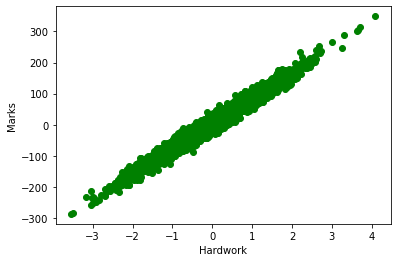

In [11]:
plt.scatter(X_train,y_train,color='green')
plt.xlabel("Hardwork")
plt.ylabel("Marks")
plt.show()

### Preprocess the data - Column standardization
- makes gradient descent works (converge) faster

In [13]:
mu=X_train.mean()
sig=X_train.std()
X_train=(X_train-mu)/sig

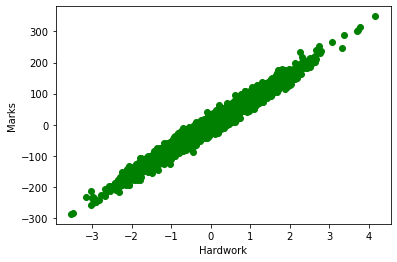

In [14]:
plt.scatter(X_train,y_train,color='green')
plt.xlabel("Hardwork")
plt.ylabel("Marks")
plt.show()

Here the data was already standardize ie mu=0 and sig=1 so no change in scales of graph

In [15]:
print(mu,sig)

-0.03779466168006855 0.9920801322508517


### Linear Regression functions

In [16]:
def hypothesis(x,theta):
    """
    x --> np array (3750,1)
    theta --> np array (2,1)
    
    return: prediction of any input x
    """
    
    return theta[0]+theta[1]*x

In [51]:
def error(x,y,theta):
    """
    x --> np array (3750,1)
    y --> np array (3750,1)
    theta --> np array (2,1)
    
    return: total error of any hypothesis
    """
    
    m=x.shape[0]
    total_error=0.0
    for i in range(m):
        ypred_i=hypothesis(x[i],theta)
        y_i=y[i]
        total_error+=(ypred_i-y_i)**2
        
    return total_error/m

In [52]:
def gradient(x,y,theta):
    """
    x --> np array (3750,1)
    y --> np array (3750,1)
    theta --> np array (2,1)
    
    return: gradient np array (2,1)
    """
    
    grad=np.zeros(2)
    m=x.shape[0]
    
    for i in range(m):
        ypred_i=hypothesis(x[i],theta)
        y_i=y[i]
        x_i=x[i]
        grad[0]+=(ypred_i-y_i)
        grad[1]+=(ypred_i-y_i)*x_i
        
    return grad/m #or grad/(2*m)

In [59]:
def gradientDescent(x,y,lr=0.01,max_itr=100):
    """
    parameters:
        x --> np array (3750,1)
        y --> np array (3750,1)
        lr --> learning rate
        max_itr --> maximum iterations
    -------------------------------------
    return:
        theta vector (2,1)
        error_list --> np array
    """
    
    theta=np.zeros(2)
    error_list=[]
    
    for i in range(max_itr):
        err=error(x,y,theta)
        error_list.append(err[0])
        
        grad=gradient(x,y,theta)
        
        # update rule
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        
    return theta,error_list

In [60]:
opt_theta,error_list=gradientDescent(X_train,y_train)

In [61]:
print(opt_theta)
print(error_list[-10:])

[ 0.43355081 50.65765297]
[1236.9340837945635, 1216.1191115565673, 1195.7183572661063, 1175.7235779860214, 1156.126694813615, 1136.9197896163341, 1118.0951018324824, 1099.6450253355317, 1081.5621053608693, 1063.8390354937003]


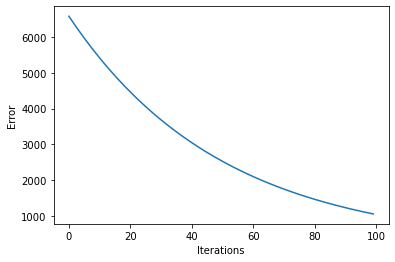

In [62]:
plt.plot(error_list)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

Note: We can see that the error is still not saturated to its minimum value so either we will have to increase lr or max_itr

In [63]:
opt_theta,error_list=gradientDescent(X_train,y_train,lr=0.1)

In [64]:
print(opt_theta)
print(error_list[-10:])

[ 0.6838508  79.90361453]
[190.95561642691717, 190.95560938658627, 190.9556036839193, 190.95559906475864, 190.95559532323833, 190.95559229260724, 190.95558983779603, 190.95558784939806, 190.95558623879643, 190.95558493420947]


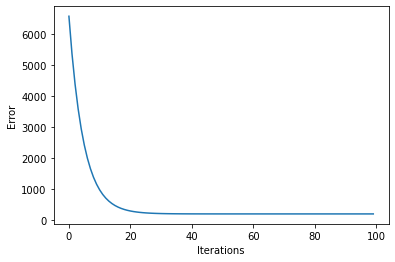

In [65]:
plt.plot(error_list)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

Now the error is saturated to minimum value which further can't be reduced

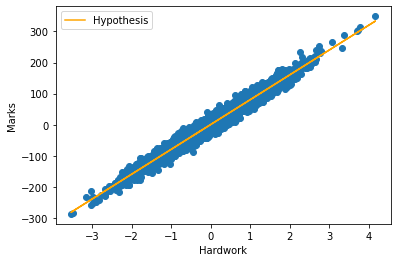

In [67]:
plt.scatter(X_train,y_train)
plt.plot(X_train,hypothesis(X_train,opt_theta),color="orange",label="Hypothesis")
plt.legend()
plt.xlabel("Hardwork")
plt.ylabel("Marks")
plt.show()

### Test data- lets obtain y_test
- since train data was being column standardized so test data should also be column standardized

In [70]:
X_test=(X_test-mu)/sig

Note: here also standardization is done using same mu and sigma

In [71]:
y_test=hypothesis(X_test,opt_theta)

In [72]:
df=pd.DataFrame(data=y_test,columns=["y"])

In [73]:
df.to_csv("y_test.csv",index=False)

## Evaluation
- R2 score / coefficient of determination

In [74]:
y_pred_on_train=hypothesis(X_train,opt_theta)

In [75]:
def r2_score(y,y_):
    """
    y --> actual values
    y_ --> predicted values
    
    return: r2 score
    """
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    
    return score

In [76]:
r2_score(y_train,y_pred_on_train)

0.9709612226971643

# sklearn - LinearRegression

In [77]:
# import
from sklearn.linear_model import LinearRegression

In [78]:
# create object
model=LinearRegression()

In [79]:
#training --> fit
model.fit(X_train,y_train)

LinearRegression()

In [81]:
# predict
y_pred=model.predict(X_test)

In [82]:
model.score(X_train,y_train)

0.9709612233822353

In [83]:
model.intercept_

array([0.68386897])

In [85]:
model.coef_

array([[79.90573694]])

In [86]:
opt_theta

array([ 0.6838508 , 79.90361453])